Load all necessary imports

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import cv2
import matplotlib.pyplot as plt
import h5py

# Configure Keras to use GPU
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)

2024-03-12 12:06:37.011740: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-12 12:06:37.044095: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 12:06:37.044123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 12:06:37.045099: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-12 12:06:37.050678: I tensorflow/core/platform/cpu_feature_guar

Data Loading

In [2]:
# with h5py.File('TrainingData5zeroes.h5', 'r') as hdf:
#     ls = list(hdf.keys())
#     images = hdf.get('images')
#     boxes = hdf.get('boxes')
#     images = np.array(images)
#     boxes = np.array(boxes)

In [2]:
# Define file paths for images and corresponding bounding boxes
image_files = [
    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/000_img.npz',
               '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/001_img.npz'
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/002_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/003_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/004_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/005_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/006_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/007_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/008_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/009_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/010_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/011_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/012_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/013_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/014_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/015_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/016_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/017_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/018_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/019_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/020_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/021_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/022_img.npz',
            
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/023_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/024_img.npz'
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/025_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/026_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/027_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/028_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/029_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/030_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/031_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/032_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/033_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/034_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/035_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/036_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/037_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/038_img.npz',
            #    '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/039_img.npz',
# '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/040_img.npz',
# '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/041_img.npz',
# '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/042_img.npz',
# '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/043_img.npz',
#                '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/044_img.npz',
#                '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/045_img.npz',
#                '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/046_img.npz',
#                '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/047_img.npz',
#                '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/048_img.npz',
#                '/home/m3-learning/Downloads/Training Data/Training/preprocessed_data/049_img.npz'
               ]
box_files = [
    '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/000_box.npz',
             '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/001_box.npz'
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/002_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/003_box.npz',
            #     '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/004_box.npz',
            #     '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/005_box.npz',
            #     '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/006_box.npz',
            #     '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/007_box.npz',
            #     '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/008_box.npz',
        
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/009_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/010_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/011_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/012_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/013_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/014_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/015_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/016_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/017_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/018_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/019_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/020_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/021_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/022_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/023_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/024_box.npz'
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/025_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/026_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/027_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/028_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/029_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/030_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/031_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/032_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/033_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/034_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/035_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/036_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/037_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/038_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/039_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/040_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/041_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/042_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/043_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/044_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/045_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/046_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/047_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/048_box.npz',
            #  '/home/m3-learning/Documents/Research Data/padded bounding boxes/padded bounding boxes-20240102T154337Z-001/padded bounding boxes/049_box.npz'
             ]



#Initialize lists to store images and boxes
images = []
boxes = []

# Load images and corresponding boxes
for image_path, box_path in zip(image_files, box_files):
    # Load images
    images_data = np.load(image_path)
    image_keys = images_data.files
    for key in image_keys:
        images.append(images_data[key])

    # Load corresponding boxes
    boxes_data = np.load(box_path)
    box_keys = boxes_data.files
    for key in box_keys:
        boxes.append(boxes_data[key])

# Convert lists to numpy arrays
images = np.array(images)
boxes = np.array(boxes)

In [23]:
boxes.shape

(400, 280, 5)

Data Normalization

In [3]:
image_normalized = (images+1)/9.26 # Normalize images and add noise


# Normalize bounding boxes
normalized_boxes = boxes / [1,64,64,64,64]

Model Train


In [91]:
from tensorflow.keras import layers, models



input_shape = (64, 64, 1)
num_classes = 280
num_coordinates = 4

images_np = image_normalized
#images_np = tf.expand_dims(images_np, axis=-1)
probabilities = np.array(normalized_boxes[:, :,:-4])
probabilities = tf.expand_dims(probabilities, axis=1)
boxes_np = np.array(normalized_boxes[:, :, 1:])
boxes_np = tf.expand_dims(boxes_np, axis=1)

dataset = tf.data.Dataset.from_tensor_slices((images_np,{'x_prob_reshape':probabilities,'x_boxes_reshape':boxes_np}))

dataset = dataset.batch(64)
dataset = dataset.shuffle(buffer_size=400, reshuffle_each_iteration=True) 



x_input = layers.Input(shape=input_shape)

x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x_input)
x = layers.MaxPool2D()(x)
x = layers.BatchNormalization()(x) 

x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)
 

x = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)


x = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)


x = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)


x = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)


x = layers.Conv2D(512, kernel_size=5, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)


x = layers.Conv2D(512, kernel_size=5, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)


x = layers.Conv2D(512, kernel_size=5, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)


x = layers.Conv2D(256, kernel_size=5, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.BatchNormalization()(x) # size: 8x8x


x = layers.Flatten()(x)
# Bounding box output
x_prob = layers.Dense(num_classes, activation='sigmoid', name='x_prob')(x)
x_prob_reshape = layers.Reshape((-1, num_classes, 1), name='x_prob_reshape')(x_prob)

x_boxes = layers.Dense(num_classes * num_coordinates, activation='sigmoid', name='x_boxes')(x)
x_boxes_reshape = layers.Reshape((-1, num_classes, num_coordinates), name='x_boxes_reshape')(x_boxes)


model = tf.keras.models.Model(x_input, [x_prob_reshape, x_boxes_reshape])


optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)  # Consider adjusting based on performance





model.compile(optimizer= optimizer, loss= {'x_prob_reshape': tf.keras.losses.BinaryCrossentropy(), 'x_boxes_reshape':tf.keras.losses.MeanSquaredError()}, metrics=['accuracy'] )
num_epochs = 3000


In [114]:
# Assuming you've already prepared train_dataset and val_dataset as shown previously

# Fit the model
history = model.fit(
    dataset,  # Training data
    epochs=num_epochs
    
        # Add other callbacks here as needed, such as ModelCheckpoint or ReduceLROnPlateau
    
)





Epoch 1/3000


1/1 [==============================] - 41s 41s/step - loss: 0.0023 - x_prob_reshape_loss: 0.0022 - x_boxes_reshape_loss: 1.3330e-04 - x_prob_reshape_accuracy: 0.9994 - x_boxes_reshape_accuracy: 0.2572
Epoch 2/3000
1/1 [==============================] - 0s 306ms/step - loss: 2.9315e-04 - x_prob_reshape_loss: 7.1847e-05 - x_boxes_reshape_loss: 2.2130e-04 - x_prob_reshape_accuracy: 1.0000 - x_boxes_reshape_accuracy: 0.2513
Epoch 3/3000
1/1 [==============================] - 0s 303ms/step - loss: 0.0014 - x_prob_reshape_loss: 9.6486e-04 - x_boxes_reshape_loss: 4.6945e-04 - x_prob_reshape_accuracy: 0.9997 - x_boxes_reshape_accuracy: 0.2517
Epoch 4/3000
1/1 [==============================] - 0s 303ms/step - loss: 3.8046e-04 - x_prob_reshape_loss: 1.4814e-04 - x_boxes_reshape_loss: 2.3232e-04 - x_prob_reshape_accuracy: 1.0000 - x_boxes_reshape_accuracy: 0.2549
Epoch 5/3000
1/1 [==============================] - 0s 304ms/step - loss: 8.0535e-04 - x_prob_reshape_loss: 4.4315e-04 - x_boxes_resha

In [126]:
model.save('modelM11copywithnoBN.h5')



In [113]:
loaded_model = tf.keras.models.load_model('modelM11copywithnoBN.h5')


In [10]:
boxes.shape

(10000, 280, 5)

In [115]:
dataset = tf.data.Dataset.from_tensor_slices((images_np,{'x_prob_reshape':probabilities,'x_boxes_reshape':boxes_np}))

dataset = dataset.batch(400)
dataset = dataset.shuffle(buffer_size=1000, reshuffle_each_iteration=True) 
inputs,targets = next(iter(dataset))
output = model.predict(inputs)

13/13 [==============================] - 0s 10ms/step


In [20]:
targets['x_boxes_reshape'][0]

<tf.Tensor: shape=(1, 280, 4), dtype=float64, numpy=
array([[[0.734375, 0.015625, 0.734375, 0.03125 ],
        [0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      ],
        ...,
        [0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      ]]])>

In [21]:
output[1][0]

array([[[1.0000000e+00, 7.2822481e-01, 1.0000000e+00, 7.0619828e-01],
        [7.1303678e-01, 1.2970885e-04, 8.1124562e-01, 5.8743940e-04],
        [8.3973110e-03, 5.3547724e-06, 1.4405793e-03, 5.6630233e-07],
        ...,
        [8.9156987e-05, 2.6598404e-05, 1.3588786e-05, 5.7922007e-05],
        [4.3181117e-05, 9.7729735e-06, 5.1067425e-05, 1.7856942e-06],
        [5.7388745e-05, 7.2670955e-06, 5.2524541e-05, 4.1765853e-09]]],
      dtype=float32)

In [117]:
import tensorflow as tf

r = np.random.randint(0,100)
tensor1 = tf.constant(targets['x_prob_reshape'], dtype=tf.float64)

tensor2 = tf.constant(output[0], dtype=tf.float32)


tensor2 = tf.cast(tensor2, tf.float64)


mse_loss_fn =  tf.keras.losses.BinaryCrossentropy()
mse_loss = mse_loss_fn(tensor1, tensor2)

print("MSE Loss:", mse_loss.numpy())


MSE Loss: 4.662502931844808e-07


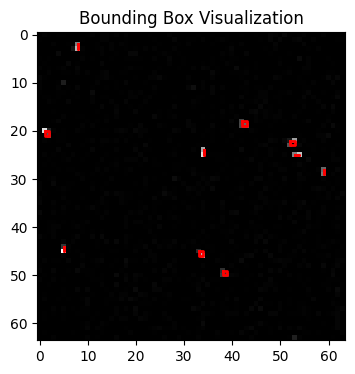

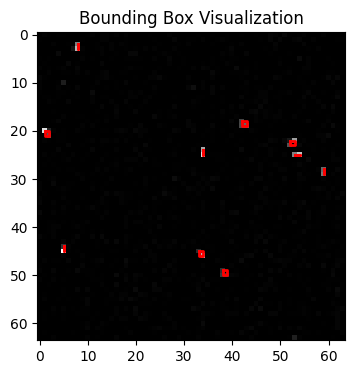

In [129]:
def visualize_bounding_boxes(image, probability_vector, bounding_box_coordinates, threshold=0.9):
    """
    Visualizes bounding boxes on an image based on a probability vector.

    Parameters:
    - image: A 3D tensor representing the image.
    - probability_vector: A 1D tensor representing the probabilities associated with bounding boxes.
    - bounding_box_coordinates: A 2D tensor representing bounding box coordinates.
    - threshold: Probability threshold for visualization.

    Returns:
    None (displays the image with bounding boxes).
    """
    # Convert to NumPy arrays for easier handling
    image_np = image
    prob_vector_np = probability_vector
    bbox_coordinates_np = bounding_box_coordinates
   # Denormalize image if necessary (adjust based on your normalization method)
    denormalized_image = image_np  # Modify if normalization was applied during training

    # Visualize the image
    plt.figure(figsize=(4, 4))
    plt.imshow(denormalized_image, cmap='gray')
    plt.title("Bounding Box Visualization")

    # Plot bounding boxes based on probability threshold
    for i in range(len(prob_vector_np)):
        prob = prob_vector_np[i]
        bbox = bbox_coordinates_np[i]
        if prob > threshold:
            # Denormalize bounding box coordinates if necessary
            denormalized_bbox = bbox  # Modify if normalization was applied during training
            y1, x1, y2, x2 = denormalized_bbox
            plt.plot([x1, x2, x2, x1, x1],[y1, y1, y2, y2, y1],
                     
                     color='r', linewidth=2, label='Bounding Box')

   






   
    plt.show()

t = np.random.randint(0,400)


visualize_bounding_boxes(tf.convert_to_tensor(inputs[t]), probabilities.numpy()[t].squeeze(), tf.convert_to_tensor(output[1][t,0,:,:])*[64,64,64,64]) ##myprediction
visualize_bounding_boxes(tf.convert_to_tensor(image_normalized[t]), probabilities.numpy()[t].squeeze(), tf.convert_to_tensor(boxes_np[t,0,:,:])*[64,64,64,64]) ##myprediction



